In [1]:
import sys
print("python version: ", sys.version)

import pandas as pd
print("pandas version: ", pd.__version__)

import numpy as np
print('numpy version: ', np.__version__)

import scipy as sp
print('scipy version: ', sp.__version__)

import sklearn as skl
print('sklearn version: ', skl.__version__)

import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import keras as ks
print('keras version: ', ks.__version__)
print('keras backend: ', ks.backend.backend())

import tensorflow as tf
print('tensorflow version: ', tf.__version__)

import warnings
warnings.filterwarnings('ignore')

from keras import backend as K
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_recall_curve

import random

python version:  3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
pandas version:  0.24.2
numpy version:  1.16.4
scipy version:  1.3.0
sklearn version:  0.21.2


Using TensorFlow backend.


keras version:  2.2.4
keras backend:  tensorflow
tensorflow version:  1.14.0


In [2]:
def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

In [3]:
excel_file = r'geriomop-data-from-egems-paper-UPDATED-COL-FIX-ATC_2-and-behavior-change-022819.tsv'
df = pd.DataFrame(pd.read_csv(excel_file, sep='\t'))
print(df.shape)

(7584, 208)


# Missing value means not relevant
### One Hot Encoding (All zero stands for NA)
* "Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days" (Y/N/U/NA)
* "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", "mds-delirium-scale", "recent-start-other-fall-risk-rx" (Y/N/NA)
* "mds-pressure-ulcer-stage-X", (X=1, 2, 3, 4) (Y/NA)

### Label Encoding & Sin, Cos Transform (NA: (0, 0))
* "mds-cognitive-scale": 
  - 'Independent': 0, 
  - 'Modified Independence': 1, 
  - 'Moderately Impaired': 2, 
  - 'Severely Impaired': 3
* "mds-pain-freq-last-five-days": 
  - 'Continuous': 4, 
  - 'Frequent': 3, 
  - 'Occasional': 2, 
  - 'Rare': 1, 
  - 'Unable to respond': 0,
* "mds-pain-intensity": 
  - 'None': 0, 
  - 'Mild': 1, 
  - 'Moderate': 2, 
  - 'Severe': 3, 
  - 'Very severe, horrible': 4
* "Psychotropic-X": Number
* (Added) "Psychotropic-X-Period": Number


# Drop features

* ~~"Unnamed: 51"~~, 
* ~~"pk-interaction", "pk-interaction-type"~~ 
* ~~"object-drug-1", "object-drug-1-dose", "object-drug-1-effective-dose-increase", "object-drug-1-effective-dose", "interaction-1-stop-date"~~, 
* ~~"object-drug-2", "object-drug-2-dose", "object-drug-2-effective-dose-increase", "object-drug-2-effective-dose", "interaction-2-stop-date"~~
* "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"
* "Blank-1", "Deleted-X" (X from 1 to 12), "Psychotropic-X-average-daily-dose", "Psychotropic-X-Start/End-date"
* "Entry-discharge-type"

# Encode features (originally) with no missing values

### Date-related Transform

* episodePeriod = episode-end-date - episode-start-date
* stayPeriod = stay-end-date - stay-start-date

### Drop Date-related Features

* "episode-start-date", "episode-end-date", "stay-start-date", "stay-end-date", "predictor-date", "projected-date"

### Binary Encoding (Y/N)

* "cms-long-stay", "mds-stay-trans-short-to-long",
* "mds-antianxiety-medication", "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
* "mds-anticoagulant-medication", "mds-diuretic-medication", "mds-hypnotic-medication",
* "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", "mds-dehydrated", "mds-depression", "mds-fever",
* "mds-impaired-mobility", "mds-impaired-transfer", "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions",
* "mds-vomiting", "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", "mds-impaired-locomot-other",
* "ws-antibiotic-anticoag-coexposure",
* "ws-psychotropic-with-not-ordered-weight-loss", "ws-diuretic-adl"

### One Hot Encoding

* "race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure", 

### Drop Feature
* "PPS-assessment", "Federal-assessment"

### Mapping

* mds-pain-non-verbal {'None/Mild':0,'Moderate/Severe':1}

# Features need imputation
### One Hot Encoding

1. Binary categories (Yes/No/NA)
   * "pneumonia", "uti", "mdro", "anemia", "septicemia", "constipation", 
   * "wound", "hyponatremia", "hyperkalemia", "embolisms", 
   * "alzheimers", "anxiety", "depression", "non-alz-dimentia", 
   * "bipolar", "parkinsons", "psychosis", "schizophrenia", "seizure", "aphasia", "emphysema", 
   * "arthritis", "ashd", "bph", "cancer", "cerebralpalsy", "stroke", "cirrhosis", "comatose", 
   * "diabetes", "dysrhythmias", "gerd", "heart-failure", "hemiplegia/hemiparesis", "hepatitis", 
   * "huntingtons", "hyperlipidemia", "hyperthyroidism", "hypothyroidism", "hypertension", 
   * "hypotension", "multiple-sclerosis", "neurogenic-bladder", "obstructive-uropathy", 
   * "osteoporosis", "paraplegia", "ptsd", "pvd", "quadriplegia", "thyroid-disorder", 
   * "tourettes", "transient-ischemic-attack", "traumatic-brain-injury", "tuberculosis", "renal-failure", 

   * "mds-delirium-scale", "mds-pain-medication", "mds-received-pain-tx-non-pharm ", "mds-received-prn-pain-medication",
   * "mds-conduct-staff-assessment-mental-status", "mds-pressure-ulcer-prsnt", "conduct_bims", "acute_mental_change",
   * "conduct_pain_assmnt", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", 
   * "limb_prosthesis_past_7_days", "no_listed_mobility_device", 


2. Other categories

   * "marital-status": 
     - "Never Married", "Married", "Widowed", "Separated", "Divorced"
   * "mds-entered-from": 
     - "Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", "Inpatient rehabilitation facility"
     - "Community (private home/apt., board/care, assisted living, group home)",  "Other", 
   * "mds-excess-weight-loss": 
     - "Yes - prescribed", "Yes - not prescribed", "No or unknown"
   * "balance_while_standing", "balance_while_walking", "balance_turning_around", "balance_toileting", "balance_bed_to_chair"
     - "Steady at all times", "able to stabilize without assistance", "able to stabilize with assistance", "Activity did not occur"
    
### Label Encoding
* "mds-urinary-incontinence"
  - "Always continent": 0, 
  - "Occasionally incontinent": 1,
  - "Frequently incontinent": 2,
  - "Always incontinent": 3,
  - "Catheter - not rated": (0, 0)


* "cam_inattention",
* "cam_disorganized_thought",
* "cam_altered_conc",
* "cam_motor_retardation"
  - "Behavior not present": 0,
  - "Behavior present, fluctuates": 1, 
  - "Behavior continuously present": 2, 

   
* "functlimit_rom_upper", 
* "functlimit_rom_lower"
   - "No impairment": 0, 
   - "Impairment on one side": 1, 
   - "Impairment on both sides": 2 


* "does_resident_wander"
   - "Behavior not exhibited": 0, 
   - "1 to 3 days": 1, 
   - "4 to 6 days": 2, 
   - "occurred daily": 3,

# Features from new dataset
* "atc_X" (X from 1 to 5) - drop in strategy 1
* "number_of_behavior_changes" - keep
* "min_effective_dose_X" - drop
* "psych_sdd_X" - drop in strategy 1

In [4]:
# drop feature
def drop_features(df, f):
    df.drop(f, axis=1, inplace=True)

In [5]:
# one hot encoding
def one_hot_encoding(df, features, categories):
    for f, c in zip(features, categories):
        df[f] = df[f].astype('category', categories=c)
    return pd.get_dummies(df, columns=features, prefix=features)

In [6]:
# compute date difference
def date_diff(start, end):
    return (pd.to_datetime(end) - pd.to_datetime(start)) / np.timedelta64(1, 'D')

In [7]:
# generate date diff features
def generate_period(df, f):
    for start, end, period in f:
        df[period] = date_diff(df[start], df[end])
        df.drop([start, end], axis=1, inplace=True)

In [8]:
# label encoding
def label_encoding(df, features, dictionaries):
    for f, dic in zip(features, dictionaries):
        df[f] = df[f].map(dic)

In [9]:
# sin&cos transform
def col_transform(df, col, mmax, mmin, df_ref=None):
    if(mmax <= mmin):
        # for test set, if max&min not set, use training set value
        if(df_ref is not None): 
            mmax = df_ref[col].max()
            mmin = df_ref[col].max()
        else:
            mmax = df[col].max()
            mmin = df[col].min()
    angle = 0.25 * np.pi * (df[col] - mmin) / (mmax - mmin) + 0.125 * np.pi
    return (np.cos(angle), np.sin(angle))

def df_transform(df, f, df_ref=None):
    for col, mmax, mmin in f:
        df[col + '_x'], df[col + '_y'] = col_transform(df, col, mmax, mmin, df_ref)
        df[col + '_x'].fillna(0, inplace=True)
        df[col + '_y'].fillna(0, inplace=True)
        df.drop(col, axis=1, inplace=True)

In [10]:
# train test split
from sklearn.model_selection import GroupShuffleSplit
def train_test_split(df, target, groupby, radio, random_state):
    train_idx, test_idx = next(GroupShuffleSplit(train_size=radio, test_size=1-radio, random_state=random_state).split(df, target, df[groupby]))
    return df.iloc[train_idx], df.iloc[test_idx], target.iloc[train_idx], target.iloc[test_idx]

In [11]:
# missing data describe
def missing_summary(df):
    missing_cnt = df.isna().sum()
    missing_data = pd.concat([missing_cnt, missing_cnt/df.shape[0]], axis=1, keys=['count', 'percentage'])
    return missing_data[missing_data['percentage'] != 0].sort_values(by='percentage', ascending=False)

In [12]:
# Drop features
f_drop = ["Blank-1", "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"] + \
         ['Deleted-%d' % i for i in range(1, 13)] + ['Psychotropic-%d' % i for i in range(1, 6)] + \
         ['Psychotropic-%d-average-daily-dose' % i for i in range(1, 6)] + ["Entry-discharge-type"]

# Missing value means not relevant
f_one_hot = ["Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days", \
             "mds-delirium-scale", "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", \
             "recent-start-other-fall-risk-rx"] + ["mds-pressure-ulcer-stage-%d" % i for i in range(1, 5)]
cate_one_hot = [['Yes', 'No', 'Unable to answer']] * 3 + [['Yes', 'No']] * 9

f_period = [("Psychotropic-%d-Start-date" % i, 'Psychotropic-%d-End-date' % i, 'Psychotropic-%d-Period' % i) for i in range(1, 6)]

f_label = ['mds-cognitive-scale', 'mds-pain-freq-last-five-days', 'mds-pain-intensity']
dic_label = [{'Independent': 0, 'Modified Independence': 1, 'Moderately Impaired': 2, 'Severely Impaired': 3}, \
             {'Continuous': 4, 'Frequent': 3, 'Occasional': 2, 'Rare': 1, 'Unable to respond': 0}, \
             {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe, horrible': 4}]

f_transform = [('mds-cognitive-scale', 3, 0), ('mds-pain-freq-last-five-days', 4, 0), ('mds-pain-intensity', 4, 0)] + \
              [('Psychotropic-%d-Period' % i, 0, 0) for i in range(1, 6)]

In [13]:
# Encode features (originally) with no missing values
f_drop += ["predictor-date", "projected-date", "PPS-assessment", "Federal-assessment"]

f_period += [('episode-start-date', 'episode-end-date', 'episode-period'),\
             ('stay-start-date', 'stay-end-date', 'stay-period')]

f_label += ["cms-long-stay", "mds-stay-trans-short-to-long", "mds-antianxiety-medication", \
            "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
            "mds-anticoagulant-medication", "mds-diuretic-medication", \
            "mds-hypnotic-medication", "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", \
            "mds-dehydrated", "mds-depression", "mds-fever", "mds-impaired-mobility", "mds-impaired-transfer", \
            "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions", "mds-vomiting", \
            "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", \
            "mds-impaired-locomot-other", "ws-antibiotic-anticoag-coexposure", \
            "ws-psychotropic-with-not-ordered-weight-loss", \
            "ws-diuretic-adl", "ws-tramadol-antidepressant-coexposure"] + ["mds-pain-non-verbal"]
dic_label += [{'Yes': 1, 'No': 0}] * 28 + [{'None/Mild':0,'Moderate/Severe':1}]

f_one_hot += ["race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure"]
cate_one_hot += [['White', 'Black', 'Other'], \
                 ['Sugar Creek', 'Heritage Place', 'Canterbury Place', 'Senaca Place', 'Cranberry Place'], \
                 ['Female', 'Male'], ['Intact or Moderately Intact', 'Moderate Impairment'], \
                 ['No', 'meclAndPsychStartSameR', 'meclPrecedesPsychR', 'psychPrecedesMeclR', 'meclAndPsychOlderStart']]

In [14]:
f_drop += ["min_effective_dose_%d" % i for i in range(1, 6)] + \
          ["Psychotropic-%d-average-daily-dose" % i for i in range(1, 6)] + \
          ["psych_sdd_%d" % i for i in range(1, 6)]

In [15]:
# generate target
target = df['outcome-Mds-fall-since-prior-assessment'].map({'None': 0, 'Yes': 1})
dff = df.drop(['outcome-mds-fall-no-injury', 'outcome-mds-fall-minor-injury', 'outcome-mds-fall-major-injury', \
               'outcome-Mds-fall-since-prior-assessment', 'outcome-riskmaster-fall-incident'], axis=1)

In [16]:
# in sdd 0 means NA
for i in range(1, 6):
    df.loc[df['psych_sdd_%d' % i] == 0, 'psych_sdd_%d' % i] = np.nan

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, 'patient-id', 0.7, 0)
print('Total number of patients: %d' % len(df.groupby('patient-id')))
print('Number of patients in training set: %d' % len(X_train.groupby('patient-id')))

Total number of patients: 3133
Number of patients in training set: 2193


In [18]:
%%time
generate_period(X_train, f_period)
label_encoding(X_train, f_label, dic_label)
X_train_original = X_train.copy() # store value range
df_transform(X_train, f_transform)
X_train = one_hot_encoding(X_train, f_one_hot, cate_one_hot)
drop_features(X_train, f_drop)

CPU times: user 17.1 s, sys: 288 ms, total: 17.3 s
Wall time: 11.7 s


In [19]:
X_train_use = X_train.copy()

In [20]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index(['marital-status', 'mds-entered-from', 'mds-pain-medication',
       'mds-received-pain-tx-non-pharm', 'mds-received-prn-pain-medication',
       'mds-excess-weight-loss', 'mds-urinary-incontinence', 'pneumonia',
       'uti', 'mdro', 'anemia', 'septicemia', 'constipation', 'wound',
       'hyponatremia', 'hyperkalemia', 'embolisms', 'alzheimers', 'anxiety',
       'depression', 'non-alz-dimentia', 'bipolar', 'parkinsons', 'psychosis',
       'schizophrenia', 'seizure', 'aphasia', 'emphysema', 'arthritis', 'ashd',
       'bph', 'cancer', 'cerebralpalsy', 'stroke', 'cirrhosis', 'comatose',
       'diabetes', 'dysrhythmias', 'gerd', 'heart-failure',
       'hemiplegia/hemiparesis', 'hepatitis', 'huntingtons', 'hyperlipidemia',
       'hyperthyroidism', 'hypothyroidism', 'hypertension', 'hypotension',
       'multiple-sclerosis', 'neurogenic-bladder', 'obstructive-uropathy',
       'osteoporosis', 'paraplegia', 'ptsd', 'pvd', 'quadriplegia',
       'thyroid-disorder', 'tourettes', '

In [21]:
missing_summary(X_train_use)

,count,percentage
atc_5,5262,0.992643
atc_4,5142,0.970006
atc_3,4769,0.899642
atc_2,3775,0.712130
atc_1,2007,0.378608
mds-conduct-staff-assessment-mental-status,1115,0.210338
marital-status,331,0.062441
functlimit_rom_upper,329,0.062064
functlimit_rom_lower,325,0.061309
balance_bed_to_chair,320,0.060366


In [22]:
%%time
generate_period(X_test, f_period)
label_encoding(X_test, f_label, dic_label)
df_transform(X_test, f_transform, X_train_original)
X_test = one_hot_encoding(X_test, f_one_hot, cate_one_hot)
drop_features(X_test, f_drop)

CPU times: user 9.8 s, sys: 87.9 ms, total: 9.89 s
Wall time: 9.89 s


In [23]:
X_test_use = X_test.copy()

In [24]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index(['marital-status', 'mds-entered-from', 'mds-pain-medication',
       'mds-received-pain-tx-non-pharm', 'mds-received-prn-pain-medication',
       'mds-excess-weight-loss', 'mds-urinary-incontinence', 'pneumonia',
       'uti', 'mdro', 'anemia', 'septicemia', 'constipation', 'wound',
       'hyponatremia', 'hyperkalemia', 'embolisms', 'alzheimers', 'anxiety',
       'depression', 'non-alz-dimentia', 'bipolar', 'parkinsons', 'psychosis',
       'schizophrenia', 'seizure', 'aphasia', 'emphysema', 'arthritis', 'ashd',
       'bph', 'cancer', 'cerebralpalsy', 'stroke', 'cirrhosis', 'comatose',
       'diabetes', 'dysrhythmias', 'gerd', 'heart-failure',
       'hemiplegia/hemiparesis', 'hepatitis', 'huntingtons', 'hyperlipidemia',
       'hyperthyroidism', 'hypothyroidism', 'hypertension', 'hypotension',
       'multiple-sclerosis', 'neurogenic-bladder', 'obstructive-uropathy',
       'osteoporosis', 'paraplegia', 'ptsd', 'pvd', 'quadriplegia',
       'thyroid-disorder', 'tourettes', '

In [25]:
missing_summary(X_test_use)

,count,percentage
atc_5,2271,0.994744
atc_4,2223,0.973719
atc_3,2039,0.893123
atc_2,1607,0.703898
atc_1,874,0.382830
mds-conduct-staff-assessment-mental-status,436,0.190977
marital-status,150,0.065703
functlimit_rom_lower,125,0.054753
functlimit_rom_upper,125,0.054753
balance_bed_to_chair,115,0.050372


In [26]:
X_train_use.shape

(5301, 189)

In [27]:
X_test_use.shape

(2283, 189)

# Experiment: Use non-missing values to train model
### Prepare Test Set Features


In [28]:
idx = missing_summary(X_train_use).index.tolist()
X_train_use.drop(columns=idx, axis=1, inplace=True)
X_test_use.drop(columns=idx, axis=1, inplace=True)

In [29]:
X_train_use.shape

(5301, 100)

In [30]:
X_test_use.shape

(2283, 100)

### RNN

In [31]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, CuDNNLSTM, GRU, Dense, Dropout, Masking, TimeDistributed
from numpy.random import seed
from tensorflow import set_random_seed
from copy import deepcopy
from keras.preprocessing.sequence import pad_sequences

In [32]:
def add_previous_outcome(X, Y):
    X = X.copy()
    x1, x2 = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = Y[X[X['patient-id']==pid].index]
        if(df.shape[0] == 1):
            x1.append(pd.Series([0]))
            x2.append(pd.Series([0]))
        else:
            # input 1=(1, 0), 0=(0, 1), NA=(0, 0)
            x1.append(pd.Series([0]))
            x1.append(df[:-1])
            x2.append(pd.Series([0]))
            x2.append(df[:-1].map({0: 1, 1: 0}))
    X['input_outcome_x'] = pd.Series(pd.concat(x1, ignore_index=True).tolist(), index=X.index)
    X['input_outcome_y'] = pd.Series(pd.concat(x2, ignore_index=True).tolist(), index=X.index)
    return X

In [33]:
def scaler_transform(X_train_use, X_test_use):    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_use.drop('patient-id', axis=1))
    X_train_transformed = pd.DataFrame(scaler.transform(X_train_use.drop('patient-id', axis=1)), \
                                       columns=X_train_use.columns[1:], index=X_train_use.index)                                   
    X_train_transformed['patient-id'] = X_train_use['patient-id']
    X_test_transformed = pd.DataFrame(scaler.transform(X_test_use.drop('patient-id', axis=1)), \
                                       columns=X_test_use.columns[1:], index=X_test_use.index) 
    X_test_transformed['patient-id'] = X_test_use['patient-id']
    return X_train_transformed, X_test_transformed

In [34]:
X_train_use = add_previous_outcome(X_train_use, y_train)
X_test_use = add_previous_outcome(X_test_use, y_test)
X_train_transformed, X_test_transformed = scaler_transform(X_train_use, X_test_use)

In [35]:
# Deprecated
# generate 3D tensor
def generate_nested_list_old_old(X, Y):
    X = X.copy()
    Y = Y.copy()
    x_list, y_list = [], [] 
    x1, x2 = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = Y[X[X['patient-id']==pid].index]
        if(df.shape[0] == 1):
            x1.append(pd.Series([0]))
            x2.append(pd.Series([0]))
        else:
            # input 1=(1, 0), 0=(0, 1), NA=(0, 0)
            x1.append(pd.Series([0]))
            x1.append(df[:-1])
            x2.append(pd.Series([0]))
            x2.append(df[:-1].map({0: 1, 1: 0}))
    X['input_outcome_x'] = pd.Series(pd.concat(x1, ignore_index=True).tolist(), index=X.index)
    X['input_outcome_y'] = pd.Series(pd.concat(x2, ignore_index=True).tolist(), index=X.index)
    for pid in pids:
        df = X[X['patient-id']==pid]
        y_list.append(Y[df.index].values)
        x_list.append([record for record in df.drop('patient-id', axis=1).values])
    return x_list, y_list

In [36]:
# gererate 3D tensor used for padding & masking
# shape: (num_of_paitent, various, num_of_features)
def generate_nested_list_old(X, Y):
    x_list, y_list = [], [] 
    pids = X['patient-id'].unique()
    for pid in pids:
        df = X[X['patient-id']==pid]
        y_list.append(Y[df.index].values)
        x_list.append([record for record in df.drop('patient-id', axis=1).values])
    return x_list, y_list

In [87]:
# generate 3D tensor used for online learning
# shape of every element in return list: (num_of_records, various, num_of_features)
def generate_nested_list(X, Y):
    x_list, y_list = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = X[X['patient-id']==pid]
        x_array = df.drop('patient-id', axis=1).values
        y_array = Y[df.index].values
        x_cache = []
        for x, y in zip(x_array, y_array):
            x_cache.append(x)
            x_list.append(np.array([x_cache]))
            y_list.append(np.array([y]))
#             x_list.append(x_cache.copy())
#             y_list.append(y)
    return x_list, y_list

In [88]:
X_train_list, y_train_list = generate_nested_list(X_train_transformed, y_train)
X_test_list, y_test_list = generate_nested_list(X_test_transformed, y_test)

In [100]:
def mygenerator(x_list, y_list=None):
    while True:
        for idx, x in enumerate(x_list):
            t_yield = x
#             t_yield = np.array([x])
            if(y_list is not None):
                t_yield = (t_yield, y_list[idx])
#                 t_yield = (t_yield, np.array([y_list[idx]]))
            yield t_yield

In [101]:
g = mygenerator(X_train_list, y_train_list)
next(g)[1]

array([0])

In [43]:
def plot_history(history, loss=None, val_loss=None):
    if(history is not None):
        loss = history.history['loss']
    plt.figure()
    plt.plot(loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if('val_loss' in history.history):
        val_loss = history.history['val_loss']
        plt.plot(val_loss)
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [107]:
def fit_model(model, epoch, X_train, y_train, generator=None, batch_size=None, validation_split=None, verbose=0):
    if(generator is not None):
        if(validation_split is not None):
            train_size = int(len(X_train) * (1 - validation_split))
            X_train_ = X_train[:train_size]
            y_train_ = y_train[:train_size]
            X_valid = X_train[train_size:]
            y_valid = y_train[train_size:]
            history = model.fit_generator(generator(X_train_, y_train_), validation_data=generator(X_valid, y_valid), 
                                          steps_per_epoch=len(X_train_), validation_steps=len(X_valid),
                                          epochs=epoch, verbose=verbose)
        else:
            history = model.fit_generator(generator(X_train, y_train), steps_per_epoch=len(X_train), 
                                          epochs=epoch, verbose=verbose)
    else:
        history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=validation_split, 
                            epochs=epoch, verbose=verbose)
    if(verbose != 0):
        plot_history(history)
    return history

In [45]:
# input type: list
# return type: numpy array
def make_prediction(model, X, generator=None):
    if(generator is not None):
        y_predict = model.predict_generator(generator(X), steps=len(X))
    else:
        y_predict = model.predict(X)
    return np.concatenate(y_predict)

In [46]:
def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [47]:
def auroc(y_predict, y_true, plot=False):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1)    
    if(plot):
        plot_roc_curve(fpr, tpr)
    return auc(fpr, tpr)

In [48]:
def find_best_f1(y_predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1) 
    max_f1, th = 0, 0
    for threshold in thresholds:
        f1 = f1_score(y_true, y_predict > threshold)
        if(f1 > max_f1):
            max_f1 = f1
            th = threshold
    return max_f1, th

In [49]:
def other_metrics(y_predict, y_true, threshold):
    y_threshold = y_predict > threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_threshold).ravel()
    return precision_score(y_true, y_threshold), recall_score(y_true, y_threshold),\
            accuracy_score(y_true, y_threshold), float(tn) / (tn + fp)

In [73]:
from keras import regularizers
from keras.optimizers import Adagrad, Adadelta, SGD
def build_model(cell_size, dropout_ratio, n_feature):
    model = Sequential()
    model.add(LSTM(cell_size, input_shape=(None, n_feature), recurrent_dropout=dropout_ratio, dropout=0.5))
#     model.add(CuDNNLSTM(cell_size, input_shape=(None, n_feature)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.006), metrics=['binary_accuracy'])
    return model

Epoch 1/60
4770/4770 [==============================] - 35s 7ms/step - loss: 0.4752 - binary_accuracy: 0.8164 - val_loss: 0.4717 - val_binary_accuracy: 0.8079
Epoch 2/60
4770/4770 [==============================] - 30s 6ms/step - loss: 0.4467 - binary_accuracy: 0.8195 - val_loss: 0.4642 - val_binary_accuracy: 0.8060
Epoch 3/60
4770/4770 [==============================] - 30s 6ms/step - loss: 0.4401 - binary_accuracy: 0.8191 - val_loss: 0.4597 - val_binary_accuracy: 0.8117
Epoch 4/60
4770/4770 [==============================] - 30s 6ms/step - loss: 0.4360 - binary_accuracy: 0.8214 - val_loss: 0.4565 - val_binary_accuracy: 0.8117
Epoch 5/60
4770/4770 [==============================] - 30s 6ms/step - loss: 0.4335 - binary_accuracy: 0.8216 - val_loss: 0.4524 - val_binary_accuracy: 0.8117
Epoch 6/60
4770/4770 [==============================] - 30s 6ms/step - loss: 0.4305 - binary_accuracy: 0.8214 - val_loss: 0.4536 - val_binary_accuracy: 0.8079
Epoch 7/60
4770/4770 [========================

4770/4770 [==============================] - 29s 6ms/step - loss: 0.4090 - binary_accuracy: 0.8275 - val_loss: 0.4454 - val_binary_accuracy: 0.8098
Epoch 53/60
4770/4770 [==============================] - 29s 6ms/step - loss: 0.4100 - binary_accuracy: 0.8275 - val_loss: 0.4454 - val_binary_accuracy: 0.8098
Epoch 54/60
4770/4770 [==============================] - 28s 6ms/step - loss: 0.4017 - binary_accuracy: 0.8312 - val_loss: 0.4424 - val_binary_accuracy: 0.8117
Epoch 55/60
4770/4770 [==============================] - 26s 6ms/step - loss: 0.4074 - binary_accuracy: 0.8294 - val_loss: 0.4429 - val_binary_accuracy: 0.8117
Epoch 56/60
4770/4770 [==============================] - 26s 6ms/step - loss: 0.4092 - binary_accuracy: 0.8268 - val_loss: 0.4433 - val_binary_accuracy: 0.8098
Epoch 57/60
4770/4770 [==============================] - 26s 5ms/step - loss: 0.4064 - binary_accuracy: 0.8254 - val_loss: 0.4440 - val_binary_accuracy: 0.8098
Epoch 58/60
4770/4770 [=============================

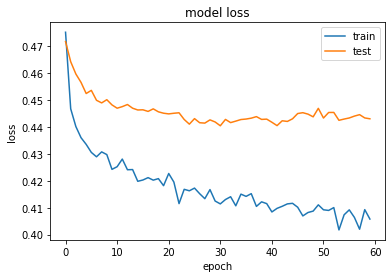

CPU times: user 1h 13min 1s, sys: 14min 37s, total: 1h 27min 38s
Wall time: 28min 34s


In [110]:
%%time
# with previous outcome
seed(1)
set_random_seed(2)
n_feature = X_train_list[0].shape[2]
model = build_model(32, 0.5, n_feature)
history = fit_model(model, 60, X_train_list, y_train_list, generator=mygenerator, validation_split=0.1, verbose=1)

In [111]:
y_predict = make_prediction(model, X_test_list, generator=mygenerator)
y_true = np.array(y_test_list)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

auroc:  0.7221521752699582
f1:  0.44206426484907496
threshold:  0.22115092
precision:  0.38215488215488214
recall:  0.5242494226327945
accuracy:  0.7490144546649146
specificity:  0.8016216216216216


In [53]:
def pad_data(X, maxlen):
    return pad_sequences(X, maxlen=maxlen, dtype='float64', padding='post')

def pad_all(X_train, y_train, X_test, y_test, maxlen):
    return pad_data(X_train, maxlen), pad_data(y_train, maxlen), pad_data(X_test, maxlen), pad_data(y_test, maxlen)

In [54]:
def truncate_prediction(y_, y_len):
    y_concat = []
    for i, y in enumerate(y_):
        y_concat.append(np.concatenate(y[:y_len[i], :]))
    y_concat = np.concatenate(y_concat)
    return y_concat

In [55]:
from sklearn.model_selection import GroupKFold
def kfold_validation_old(unit, ratio, epoch, X, y, groupby, k=5, verbose=0):
    auroc_list = []
    for train_idx, valid_idx in GroupKFold(n_splits=5).split(X, y, X[groupby]):
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        X_train, y_train = generate_nested_list(X_train, y_train)
        X_valid, y_valid = generate_nested_list(X_valid, y_valid)
        seed(1)
        set_random_seed(2)
        model = build_model(unit, ratio, 1, X_train[0][0].shape[0])
        if (verbose == 0):
            fit_model(model, epoch, X_train, y_train)
        else:
            fit_model(model, epoch, X_train, y_train, X_valid, y_valid, verbose)
        y_predict = model.predict_generator(mygenerator(X_valid), steps=len(X_valid))
        y_predict = np.concatenate(y_predict)
        y_true = np.concatenate(y_valid)
        auroc_list.append(auroc(y_predict, y_true))
    return auroc_list 

In [56]:
X_train_pad, y_train_pad, X_test_pad, y_test_pad = pad_all(X_train_list, y_train_list, X_test_list, y_test_list, max_timestamps)
y_train_pad = y_train_pad.reshape((2193, 19, 1))

NameError: name 'max_timestamps' is not defined

In [ ]:
X_train_pad2, y_train_pad2, X_test_pad2, y_test_pad2 = pad_all(X_train_list2, y_train_list2, X_test_list2, y_test_list2, max_timestamps)
y_train_pad2 = y_train_pad2.reshape((2193, 19, 1))

In [ ]:
from sklearn.model_selection import GroupKFold
def kfold_validation(unit, ratio, epoch, X, y, groupby, k=5, verbose=0, max_timestamps=20, n_features=100):
    auroc_list = []
    for train_idx, valid_idx in GroupKFold(n_splits=5).split(X, y, X[groupby]):
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        X_train, y_train = generate_nested_list(X_train, y_train)
        X_valid, y_valid = generate_nested_list(X_valid, y_valid)
        X_train_pad, y_train_pad, X_valid_pad, y_valid_pad = pad_all(X_train, y_train, X_valid, y_valid, max_timestamps)
        y_train_pad = y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)
        seed(1)
        set_random_seed(2)
        model = build_model(unit, ratio, max_timestamps, n_features)
        fit_model(model, epoch, X_train_pad, y_train_pad, verbose=verbose)
        y_valid_len = [len(y) for y in y_valid]
        y_predict = model.predict(X_valid_pad)
        y_predict = truncate_prediction(y_predict, y_valid_len)
        y_true = np.concatenate(y_valid)
        auroc_list.append(auroc(y_predict, y_true))
    return auroc_list 

In [ ]:
%%time
# with previous outcome
# add outcome before scaling
seed(1)
set_random_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features)
fit_model(model, 175, X_train_pad, y_train_pad, verbose=1)
y_predict = model.predict(X_test_pad)
y_test_len = [len(y) for y in y_test_list]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

In [ ]:
%%time
# with previous outcome
# scale before add
seed(1)
set_random_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features2)
fit_model(model, 175, X_train_pad2, y_train_pad2, verbose=1)
y_predict = model.predict(X_test_pad2)
y_test_len = [len(y) for y in y_test_list2]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list2)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

In [ ]:
# training set performance
y_predict_train = model.predict(X_train_pad)
y_train_len = [len(y) for y in y_train_list]
y_predict_train = truncate_prediction(y_predict_train, y_train_len)
y_true_train = np.concatenate(y_train_list)
print('auroc: ', auroc(y_predict_train, y_true_train))
f1, th = find_best_f1(y_predict_train, y_true_train)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict_train, y_true_train, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

In [ ]:
%%time
# K-Fold Cross Validation
result = []
pdic = [(32, [], [0.5])]
for unit, epoch_list, ratio_list in pdic:
    for epoch in epoch_list:
        for ratio in ratio_list:
            auroc_list = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', \
                                          verbose=1, max_timestamps=max_timestamps, n_features=n_features)
            result.append((unit, epoch, auroc_list))
            print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

In [ ]:
for unit, epoch, auroc_list in result:
    print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

unit: 32	epoch: 5	auroc_mean: 0.671844	auroc_std: 0.011108
unit: 32	epoch: 50	auroc_mean: 0.689895	auroc_std: 0.011584
unit: 32	epoch: 100	auroc_mean: 0.693467	auroc_std: 0.012354
unit: 32	epoch: 125	auroc_mean: 0.695942	auroc_std: 0.012456
unit: 32	epoch: 150	auroc_mean: 0.697040	auroc_std: 0.012438
unit: 32	epoch: 175	auroc_mean: 0.697905	auroc_std: 0.012803
unit: 32	epoch: 200	auroc_mean: 0.698378	auroc_std: 0.012308

unit: 24	epoch: 50	auroc_mean: 0.688865	auroc_std: 0.009856

In [ ]:
%%time
seed(1)
set_random_seed(2)
auroc_list = []
precision_list = []
recall_list = []
accuracy_list = []
specificity_list = []
f1_list = []
th_list = []
for i in range(0,1):
    model = build_model(32, 0.5, 1, X_train_list[0][0].shape[0])
    history = fit_model(model, 180, X_train_list, y_train_list, X_test_list, y_test_list, verbose=1)
    y_predict = model.predict_generator(mygenerator(X_test_list), steps=len(X_test_list))
    y_predict = np.concatenate(y_predict)
    y_true = np.concatenate(y_test_list)
    auroc_list.append(auroc(y_predict, y_true))
    f1, th = find_best_f1(y_predict, y_true)
    f1_list.append(f1)
    th_list.append(th)
    precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    specificity_list.append(specificity)
print('avg auroc: ', np.mean(auroc_list))
print('avg precision: ', np.mean(precision_list))
print('avg recall: ', np.mean(recall_list))
print('avg accuracy: ', np.mean(accuracy_list))
print('avg specificity: ', np.mean(specificity_list))
print('avg f1: ', np.mean(f1_list));
print('auroc: ', auroc_list)
print('precision: ', precision_list)
print('recall: ', recall_list)
print('accuracy: ', accuracy_list)
print('specificity: ', specificity_list)
print('f1: ', f1_list);
print('threshold: ', th_list)

In [ ]:
y_predict_t = model.predict_generator(mygenerator(X_train_list), steps=len(X_train_list))
y_predict_t = np.concatenate(y_predict_t)
y_true_t = np.concatenate(y_train_list)

f1_t, th_t = find_best_f1(y_predict_t, y_true_t)
precision_t, recall_t, accuracy_t, specificity_t = other_metrics(y_predict_t, y_true_t, th_t)

print('auroc: ', auroc(y_predict_t, y_true_t))
print('precision: ', precision_t)
print('recall: ', recall_t)
print('accuracy: ', accuracy_t)
print('specificity: ', specificity_t)
print('f1: ', f1_t);
print('threshold: ', th_t)

In [ ]:
# from sklearn.calibration import calibration_curve
# # fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_predict, n_bins=10)
# fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_predict, normalize=True, n_bins=10)
# with open("exp_1_cal.csv", "w") as writeFile:
#     writer  = csv.writer(writeFile)
#     writer.writerows([fraction_of_positives, mean_predicted_value])

# plt.figure()
# plt.plot(mean_predicted_value, fraction_of_positives, 's-')
# plt.plot([0, 1], [0, 1], '--', color='gray')
# plt.show()

In [ ]:
# import csv 
# fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1)
# plot_roc_curve(fpr, tpr)
# with open("exp_1.csv", "w") as writeFile:
#     writer  = csv.writer(writeFile)
#     writer.writerows([fpr, tpr, [recall, 1-specificity]])

In [ ]:
%%time
seed(1)
set_random_seed(2)
auroc_list = []
precision_list = []
recall_list = []
accuracy_list = []
specificity_list = []
f1_list = []
th_list = []
for i in range(0,5):
    model = build_model(32, 0.5, 1, X_train_list[0][0].shape[0])
    history = fit_model(model, 180, X_train_list, y_train_list, X_test_list, y_test_list, verbose=1)
    y_predict = model.predict_generator(mygenerator(X_test_list), steps=len(X_test_list))
    y_predict = np.concatenate(y_predict)
    y_true = np.concatenate(y_test_list)
    auroc_list.append(auroc(y_predict, y_true))
    f1, th = find_best_f1(y_predict, y_true)
    f1_list.append(f1)
    th_list.append(th)
    precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    specificity_list.append(specificity)
print('avg auroc: ', np.mean(auroc_list))
print('avg precision: ', np.mean(precision_list))
print('avg recall: ', np.mean(recall_list))
print('avg accuracy: ', np.mean(accuracy_list))
print('avg specificity: ', np.mean(specificity_list))
print('avg f1: ', np.mean(f1_list));
print('auroc: ', auroc_list)
print('precision: ', precision_list)
print('recall: ', recall_list)
print('accuracy: ', accuracy_list)
print('specificity: ', specificity_list)
print('f1: ', f1_list);
print('threshold: ', th_list)

In [ ]:
%%time
# K-Fold Cross Validation
ratio = 0.1
result = []
pdic = [(32, [225], [0.5])]
for unit, epoch_list, ratio_list in pdic:
    for epoch in epoch_list:
        for ratio in ratio_list:
            auroc_list = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', verbose=1)
            result.append((unit, epoch, auroc_list))
            print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

In [ ]:
for unit, epoch, auroc_list in result:
    print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

unit: 32	epoch: 150	auroc_mean: 0.716831	auroc_std: 0.013252
unit: 32	epoch: 175	auroc_mean: 0.717295	auroc_std: 0.013509
unit: 32	epoch: 200	auroc_mean: 0.717797	auroc_std: 0.013301